# Atractor de Lorenz

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#Defino la función de fuerza
def func(t,y):

    dxdt = 10*(y[1]-y[0])
    dydt = y[0]*(28-y[2])-y[1]
    dzdt = y[0]*y[1]-8./3*y[2]

    return np.array([dxdt,dydt,dzdt])

/home/catalina/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/home/catalina/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/home/catalina/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/home/catalina/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in add
  if __name__ == '__main__':


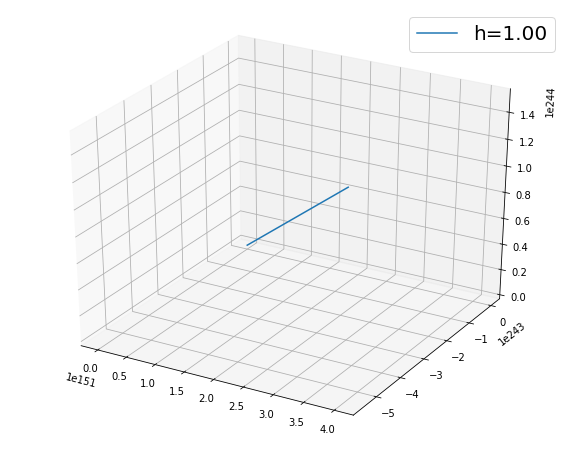

[[ 0.00000000e+000  1.00000000e+000  1.00000000e+000  1.00000000e+000]
 [ 1.00000000e+000  3.03002778e+003  4.61111101e+004 -1.28363239e+005]
 [ 2.00000000e+000 -3.44056956e+022 -9.43982799e+034  2.62707325e+035]
 [ 3.00000000e+000  4.01668616e+151 -5.53131404e+243  1.53934660e+244]
 [ 4.00000000e+000              nan              nan              nan]
 [ 5.00000000e+000              nan              nan              nan]
 [ 6.00000000e+000              nan              nan              nan]
 [ 7.00000000e+000              nan              nan              nan]
 [ 8.00000000e+000              nan              nan              nan]
 [ 9.00000000e+000              nan              nan              nan]
 [ 1.00000000e+001              nan              nan              nan]
 [ 1.10000000e+001              nan              nan              nan]
 [ 1.20000000e+001              nan              nan              nan]
 [ 1.30000000e+001              nan              nan              nan]
 [ 1.4

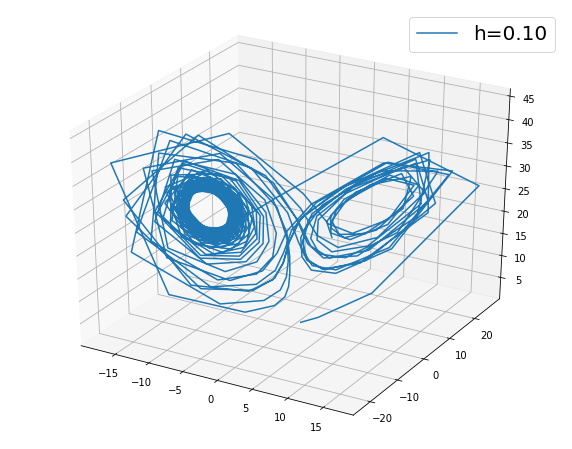

[[ 0.          1.          1.          1.        ]
 [ 0.1         2.23690694  4.29534952  1.09179853]
 [ 0.2         6.54205728 13.5076992   4.14416637]
 ...
 [39.7         6.5614546   2.50337466 29.70758871]
 [39.8         3.97054381  2.80666057 23.82049484]
 [39.9         3.94544773  4.86162045 19.48753936]]


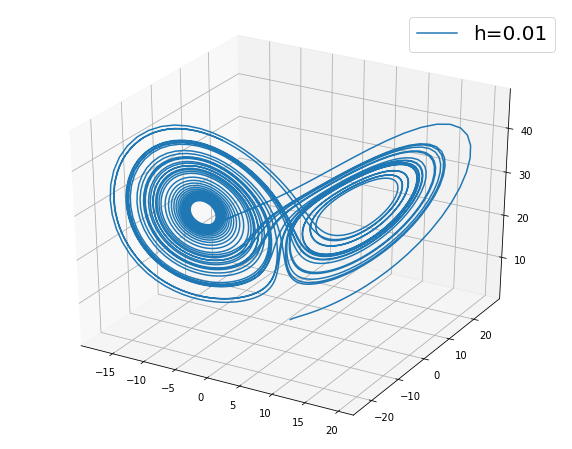

[[ 0.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 1.00000000e-02  1.01256719e+00  1.25991780e+00  9.84890972e-01]
 [ 2.00000000e-02  1.04882371e+00  1.52399713e+00  9.73114220e-01]
 ...
 [ 3.99700000e+01 -1.22007345e+01 -9.20058693e-01  4.11079619e+01]
 [ 3.99800000e+01 -1.10540490e+01  5.46688832e-01  4.00459632e+01]
 [ 3.99900000e+01 -9.89039180e+00  1.73695501e+00  3.88727723e+01]]


In [10]:
def rk4(func,t,y): #t e y ingresan como vectores


    k1=func(t,y)
    k2=func(t+0.5*h , y+0.5*h*k1)
    k3=func(t+0.5*h , y+0.5*h*k2)
    k4=func(t+h,y+h*k3)
    
    value=y+h/6*(k1+2*k2+2*k3+k4)
    
    return value

#Condiciones iniciales
y0=[1,1,1]

#Intérvalo de solución
t_ini=0.
t_end=40.


for h in (1,.1,.01):
    
    #Tamaño de paso
    N=int((t_end-t_ini)/h)
    #Construyo vector de tiempo para la solución
    t_array=[]
    for i in range(0,N+1):
        ti=t_ini+i*h
        t_array.append(ti)

    #Solución
    sol=np.zeros((N,4))
    sol[0][0]=t_array[0]
    sol[0][1]=y0[0]
    sol[0][2]=y0[1]
    sol[0][3]=y0[2]

    for i in range(1,N):
        sol[i][0]=t_array[i]
        sol[i][1]=rk4(func,sol[i-1][0],[sol[i-1][1],sol[i-1][2],sol[i-1][3]])[0]
        sol[i][2]=rk4(func,sol[i-1][0],[sol[i-1][1],sol[i-1][2],sol[i-1][3]])[1]
        sol[i][3]=rk4(func,sol[i-1][0],[sol[i-1][1],sol[i-1][2],sol[i-1][3]])[2]
        
    plt.rcParams['legend.fontsize'] = 20
    fig = plt.figure(h,figsize=(10,8))
    ax = fig.gca(projection='3d')

    # Prepare arrays x, y, z
    x = sol[:,1]
    y = sol[:,2]
    z = sol[:,3]

    ax.plot(x, y, z, label='h=%.2f' %(h))
    ax.legend()

    plt.show()
    
    print(sol)